In [1]:
import numpy as np
import pandas as pd

In [2]:
data_train = pd.read_csv('data/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test = pd.read_csv('data/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df = data_train.append(data_test, sort = True)
df.shape

(1309, 12)

In [5]:
df.info()
print('-------------------------------------')
print(pd.isnull(df).sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
-------------------------------------
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


Features:
Age: 年龄
Cabin: 客舱
Embarked: 登船港口
Fare: 票价
Name: 姓名
Parch: 父母子女个数
PassengerId: 乘客id
Pclass: 乘客等级（一、二、三等舱）
Sex: 性别
SibSp: 堂兄弟姐妹个数
Ticket: 船票信息
Target:

Survived: 是否生还
The feature Age, Cabin, Embarked, Fare has null value, the most is Cabin.

In [6]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


# Data visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')
plt.rc('font', family='DejaVu Sans', size=13)

In [8]:
cat_list = ['Cabin', 'Embarked', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Ticket']
for n, i in enumerate(cat_list):
    cat_num = len(df[i].value_counts().index)
    print('The feature "%s" has %d values.' % (i, cat_num))

The feature "Cabin" has 186 values.
The feature "Embarked" has 3 values.
The feature "Name" has 1307 values.
The feature "Parch" has 8 values.
The feature "Pclass" has 3 values.
The feature "Sex" has 2 values.
The feature "SibSp" has 7 values.
The feature "Ticket" has 929 values.


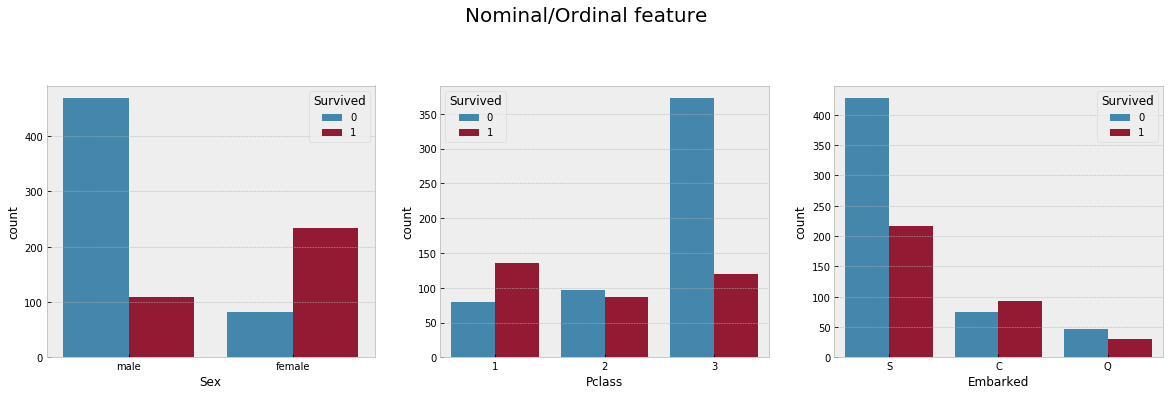

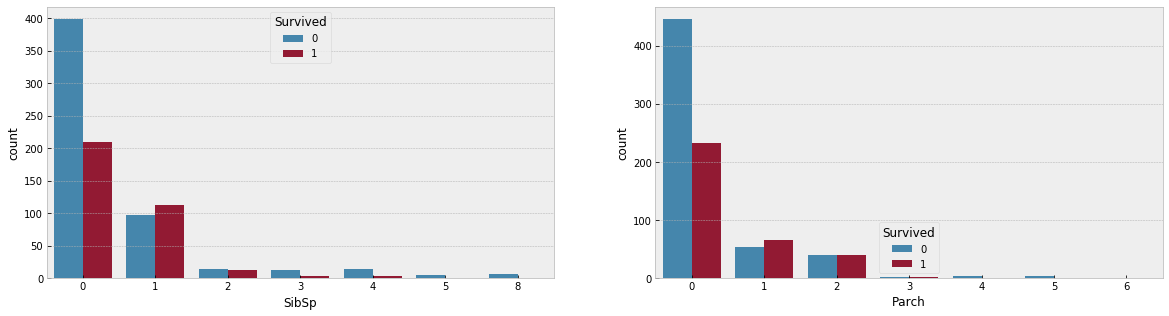

In [9]:
f, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize = (20, 5))
sns.countplot(x = 'Sex', hue = 'Survived', data = data_train, ax = ax1)
sns.countplot(x = 'Pclass', hue = 'Survived', data = data_train, ax = ax2)
sns.countplot(x = 'Embarked', hue = 'Survived', data = data_train, ax = ax3)
f.suptitle('Nominal/Ordinal feature', size = 20, y = 1.1)

f, [ax1, ax2] = plt.subplots(1, 2, figsize = (20, 5))
sns.countplot(x = 'SibSp', hue = 'Survived', data = data_train, ax = ax1)
sns.countplot(x = 'Parch', hue = 'Survived', data = data_train, ax = ax2)

plt.show()

In the five features, Sex/Pclass is important.

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


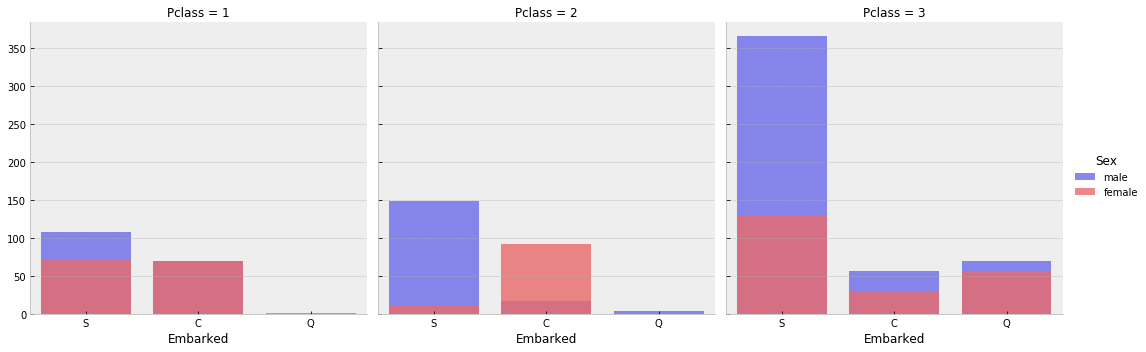

In [10]:
grid = sns.FacetGrid(df, col = 'Pclass', hue = 'Sex', palette = 'seismic', height = 5)
grid.map(sns.countplot, 'Embarked', alpha = 0.8)
grid.add_legend()

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


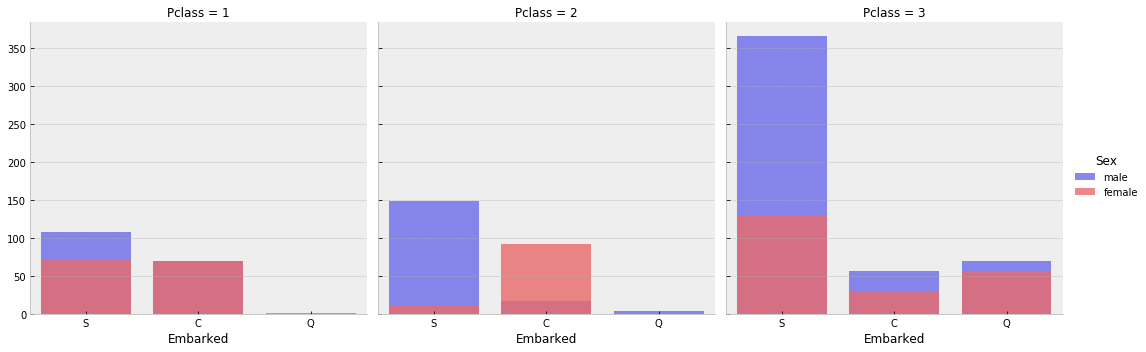

In [11]:
grid = sns.FacetGrid(df, col = 'Pclass', hue = 'Sex', palette = 'seismic', height = 5)
grid.map(sns.countplot, 'Embarked', alpha = 0.8)
grid.add_legend()

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


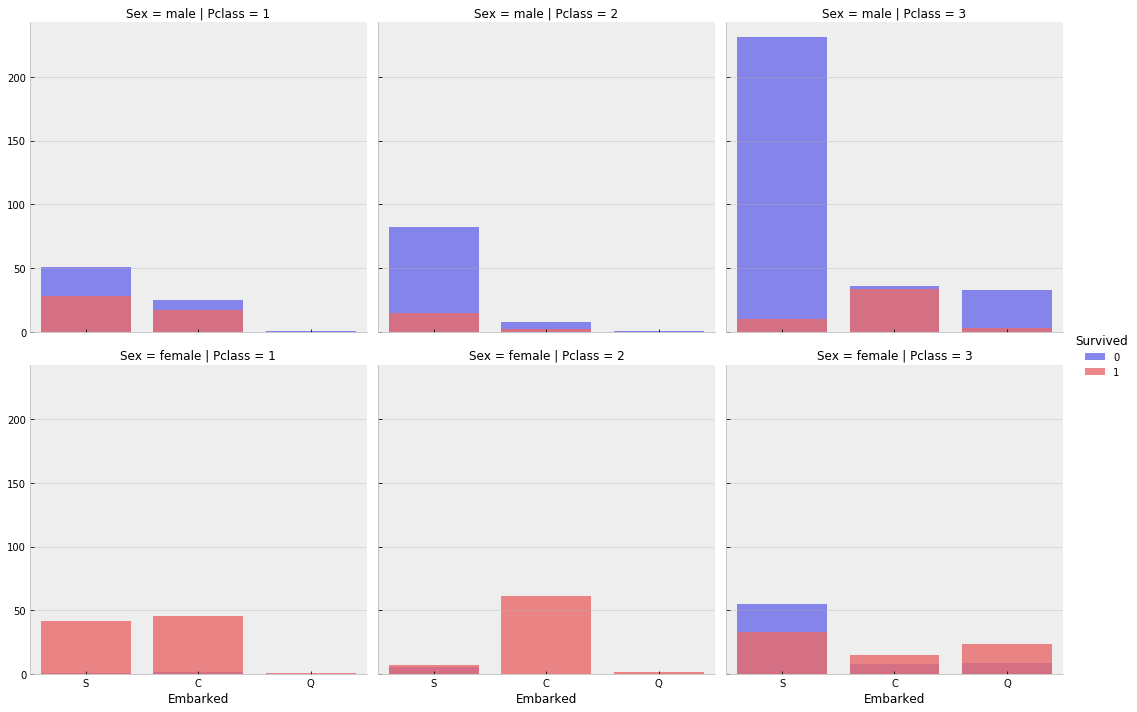

In [12]:
grid = sns.FacetGrid(data_train, row = 'Sex', col = 'Pclass', hue = 'Survived', palette = 'seismic', height = 5)
grid.map(sns.countplot, 'Embarked', alpha = 0.8)
grid.add_legend()

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

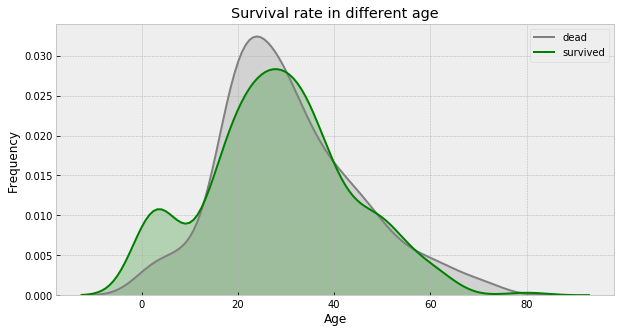

In [13]:
f, ax = plt.subplots(figsize = (10, 5))
sns.kdeplot(data_train.loc[data_train.Survived == 0, 'Age'], color = 'gray', shade = True, label = 'dead')
sns.kdeplot(data_train.loc[data_train.Survived == 1, 'Age'], color = 'green', shade = True, label = 'survived')
plt.title('Survival rate in different age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Children have high survival rate.

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "mat

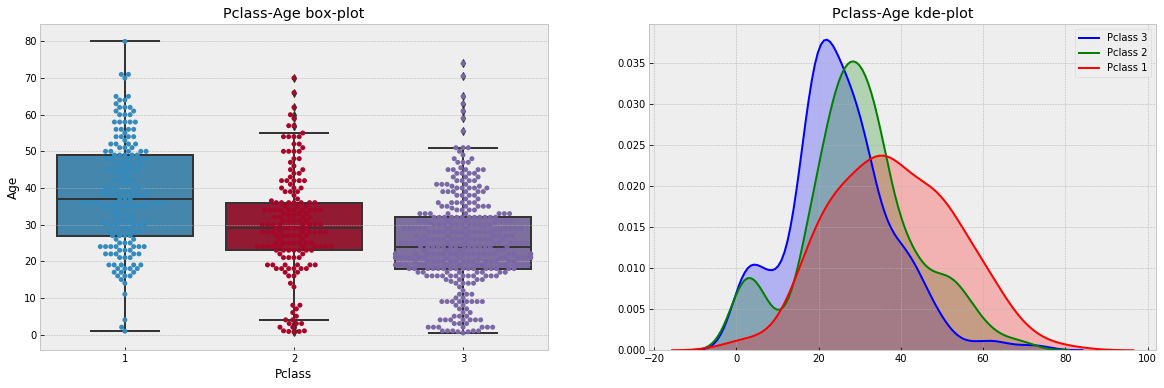

In [14]:
f, [ax1, ax2] = plt.subplots(1, 2, figsize = (20, 6))
sns.boxplot(x = 'Pclass', y = 'Age', data = data_train, ax = ax1)
sns.swarmplot(x = 'Pclass', y = 'Age', data = data_train, ax = ax1)
sns.kdeplot(data_train.loc[data_train.Pclass == 3, 'Age'], color = 'b', shade = True, label = 'Pclass 3', ax = ax2)
sns.kdeplot(data_train.loc[data_train.Pclass == 2, 'Age'], color = 'g', shade = True, label = 'Pclass 2', ax = ax2)
sns.kdeplot(data_train.loc[data_train.Pclass == 1, 'Age'], color = 'r', shade = True, label = 'Pclass 1', ax = ax2)
ax1.set_title('Pclass-Age box-plot')
ax2.set_title('Pclass-Age kde-plot')
f.show()

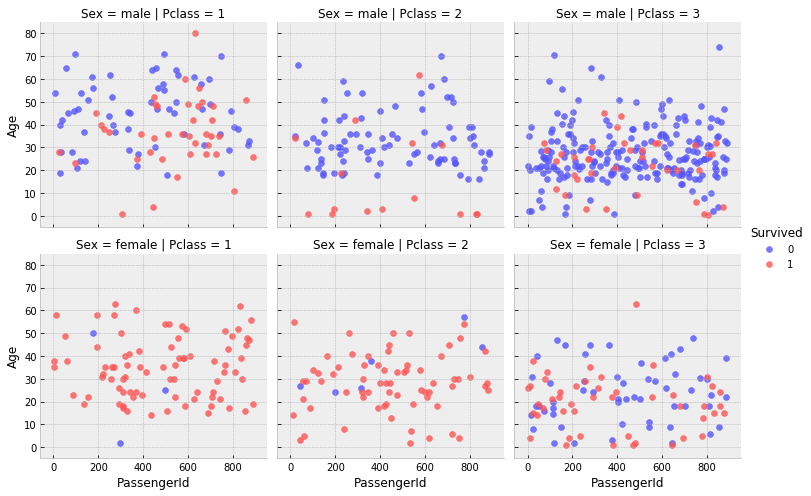

In [15]:
grid = sns.FacetGrid(data_train, row = 'Sex', col = 'Pclass', hue = 'Survived', palette = 'seismic', height = 3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha = 0.8)
grid.add_legend()

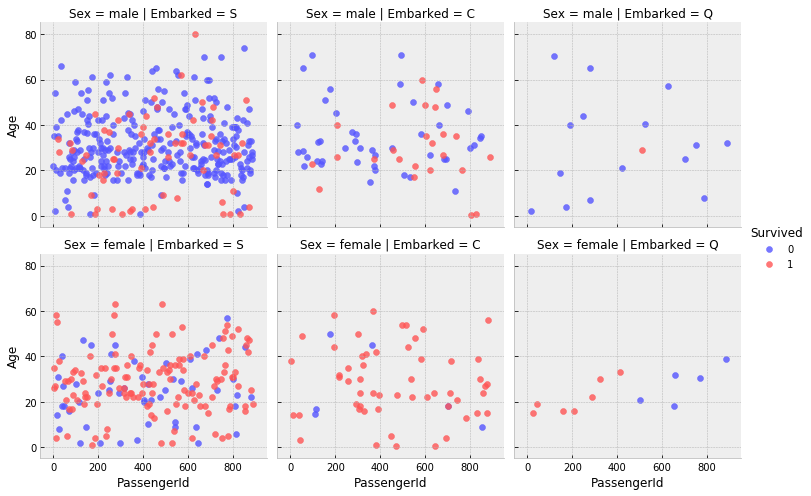

In [16]:
grid = sns.FacetGrid(data_train, row = 'Sex', col = 'Embarked', hue = 'Survived', palette = 'seismic', height = 3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha = 0.8)
grid.add_legend()

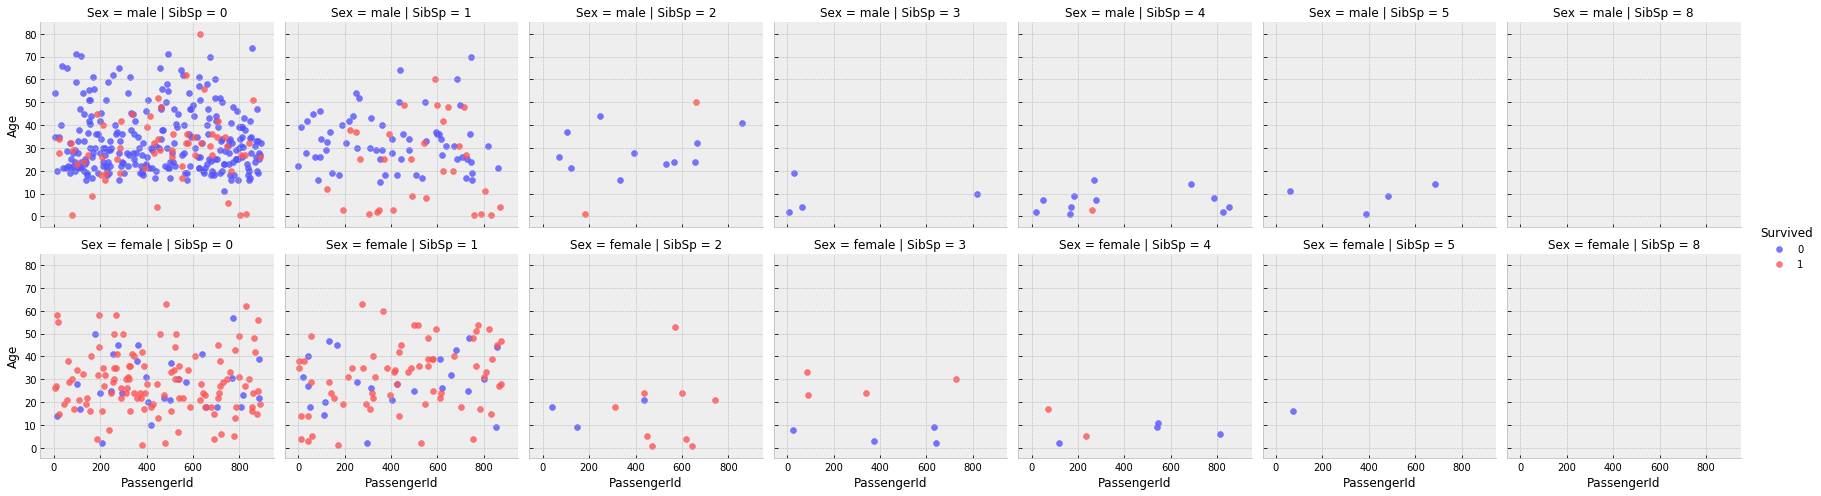

In [17]:
grid = sns.FacetGrid(data_train, row = 'Sex', col = 'SibSp', hue = 'Survived', palette = 'seismic', height = 3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha = 0.8)
grid.add_legend()

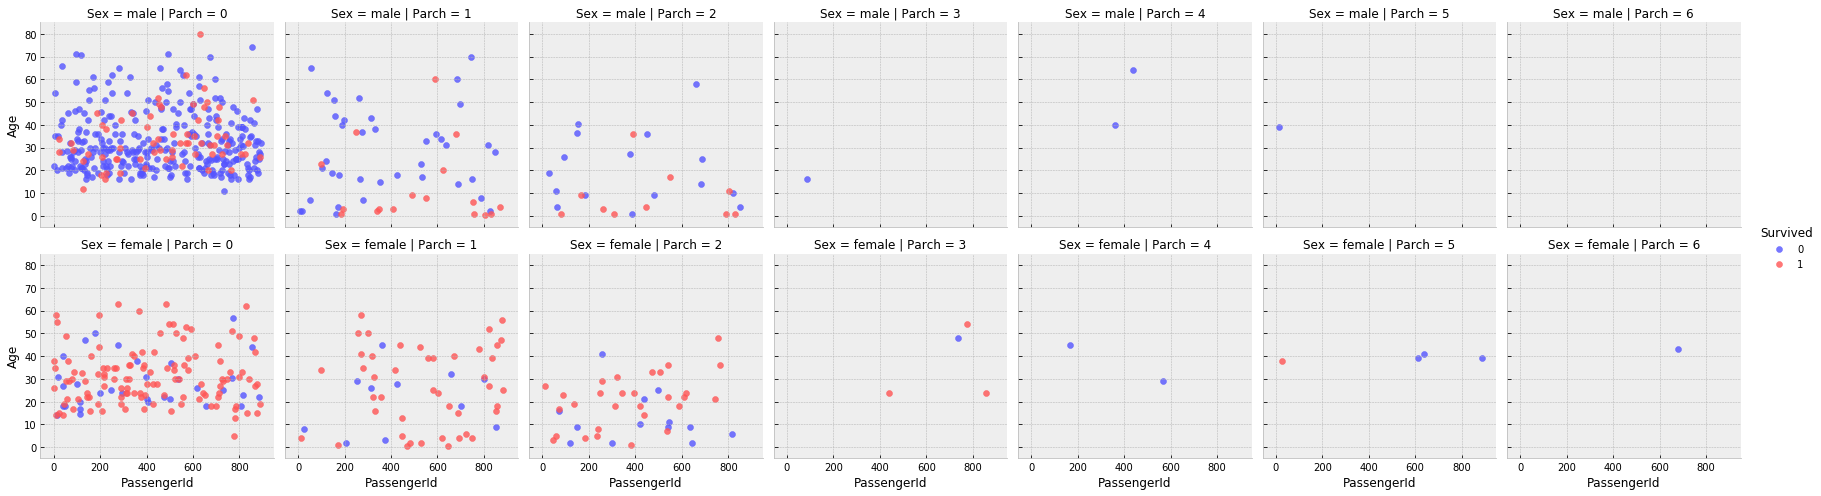

In [18]:
grid = sns.FacetGrid(data_train, row = 'Sex', col = 'Parch', hue = 'Survived', palette = 'seismic', height = 3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha = 0.8)
grid.add_legend()

d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

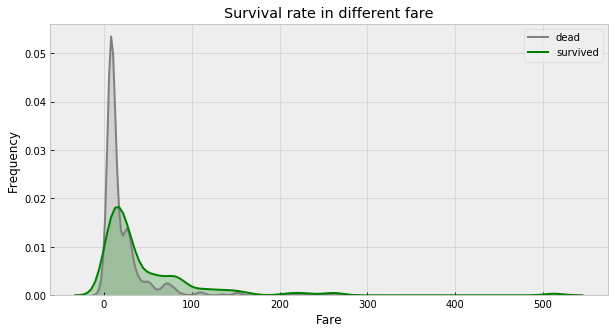

In [19]:
f, ax = plt.subplots(figsize = (10, 5))
sns.kdeplot(data_train.loc[data_train.Survived == 0, 'Fare'], color = 'gray', shade = True, label = 'dead')
sns.kdeplot(data_train.loc[data_train.Survived == 1, 'Fare'], color = 'green', shade = True, label = 'survived')
plt.title('Survival rate in different fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

The rich have higher survival rate.

d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


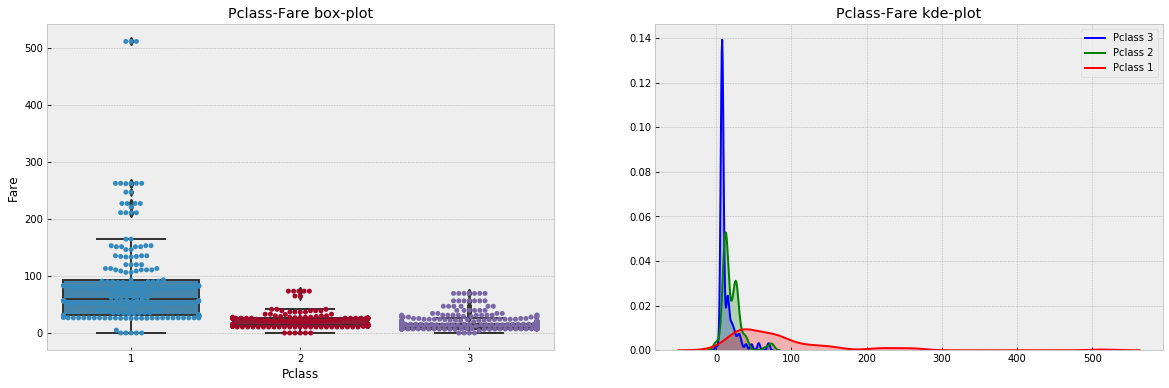

In [20]:
f, [ax1, ax2] = plt.subplots(1, 2, figsize = (20, 6))
sns.boxplot(x = 'Pclass', y = 'Fare', data = data_train, ax = ax1)
sns.swarmplot(x = 'Pclass', y = 'Fare', data = data_train, ax = ax1)
sns.kdeplot(data_train.loc[data_train.Pclass == 3, 'Fare'], color = 'b', shade = True, label = 'Pclass 3', ax = ax2)
sns.kdeplot(data_train.loc[data_train.Pclass == 2, 'Fare'], color = 'g', shade = True, label = 'Pclass 2', ax = ax2)
sns.kdeplot(data_train.loc[data_train.Pclass == 1, 'Fare'], color = 'r', shade = True, label = 'Pclass 1', ax = ax2)
ax1.set_title('Pclass-Fare box-plot')
ax2.set_title('Pclass-Fare kde-plot')
f.show()

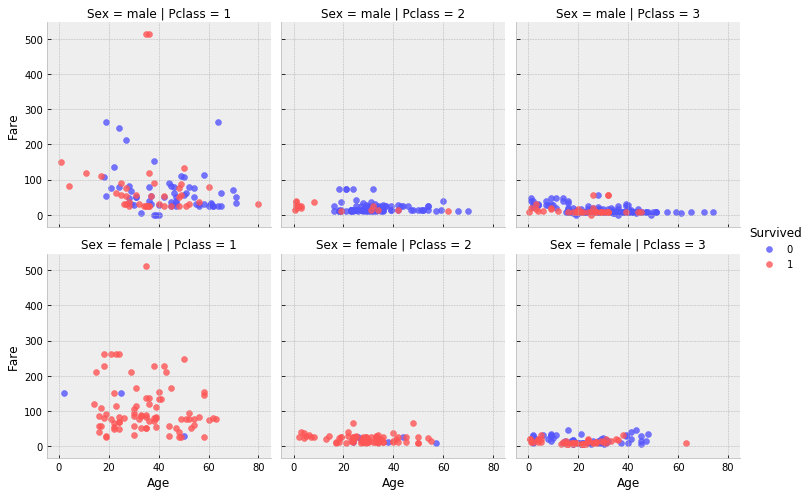

In [21]:
grid = sns.FacetGrid(data_train, row = 'Sex', col = 'Pclass', hue = 'Survived', palette = 'seismic', height = 3.5)
grid.map(plt.scatter, 'Age', 'Fare', alpha = 0.8)
grid.add_legend()

d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
d

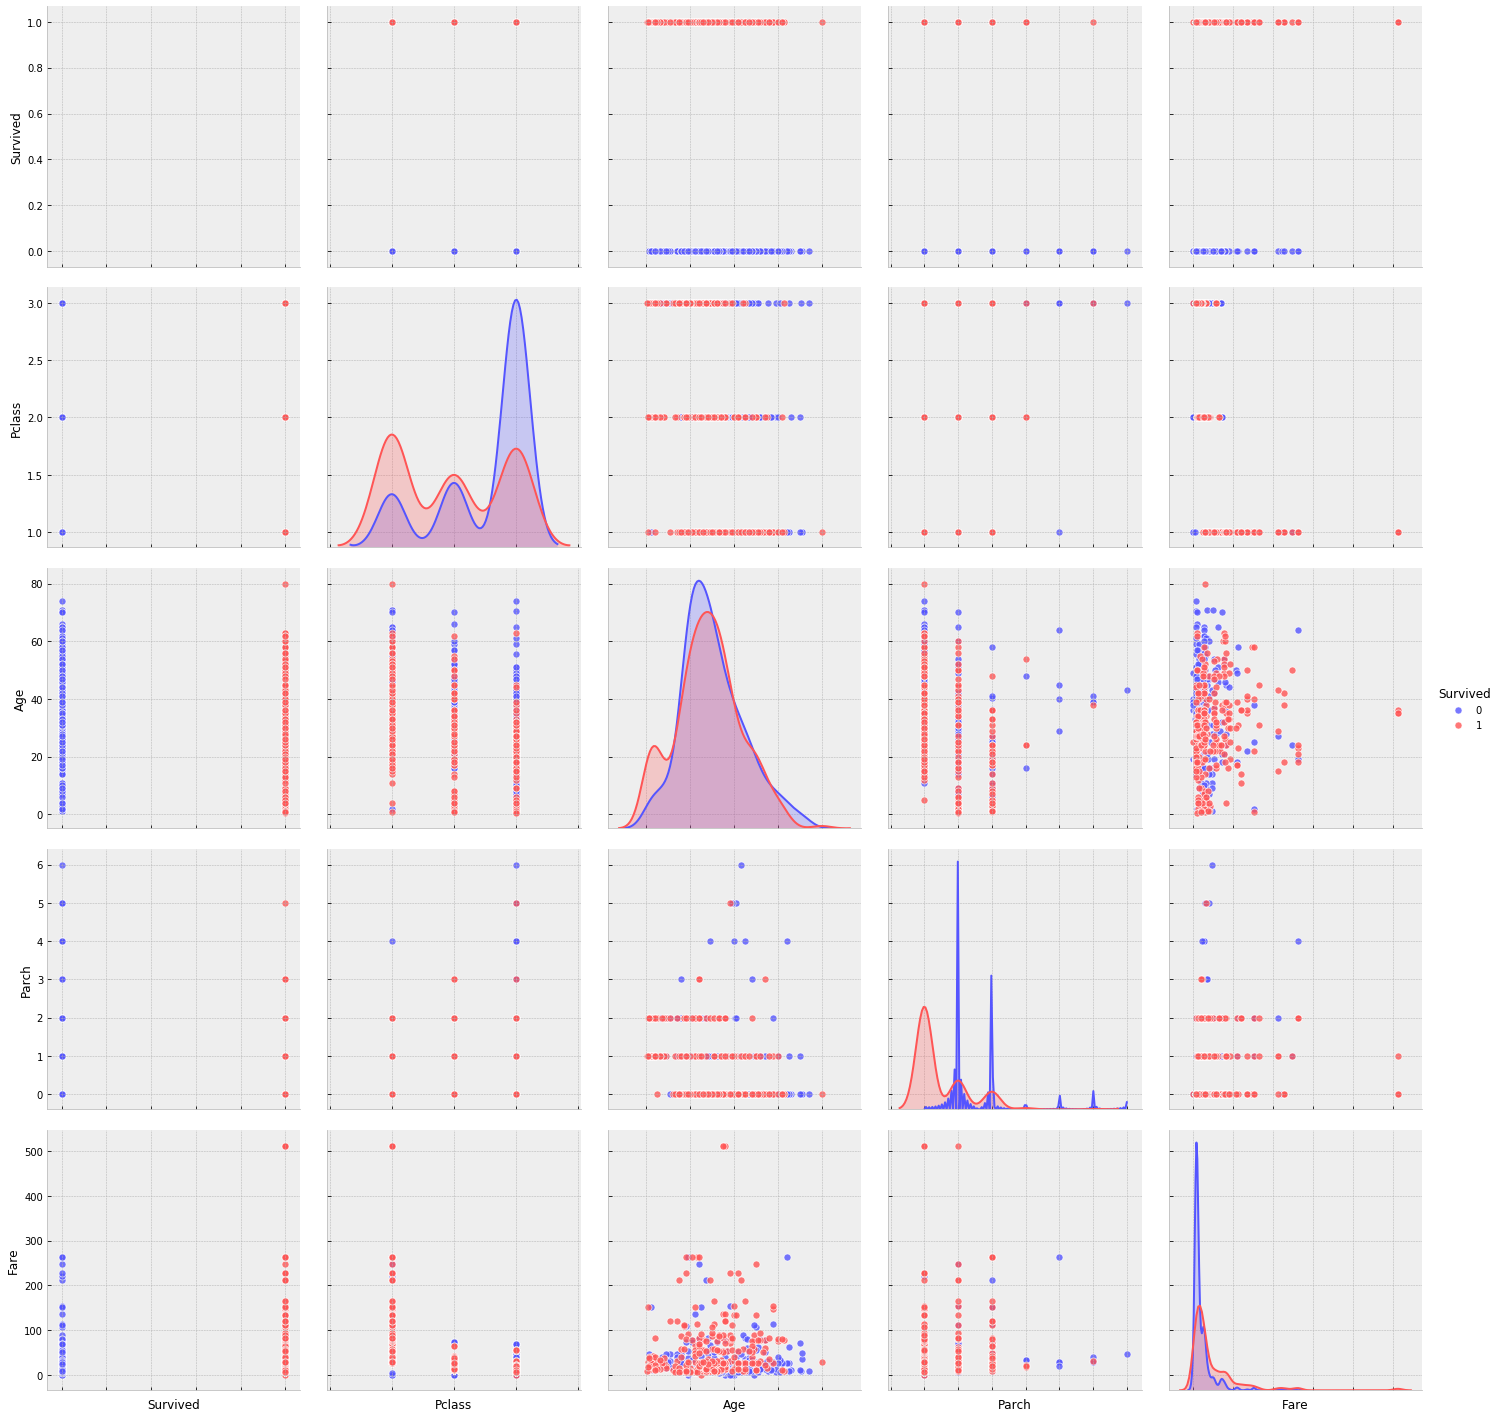

In [22]:
g = sns.pairplot(data_train[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']], hue = 'Survived', palette = 'seismic', height = 4, diag_kind = 'kde', diag_kws = dict(shade = True), plot_kws = dict(s = 50, alpha = 0.8))
g.set(xticklabels = [])

# Data preprocessing

## Data cleaning

In [23]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [24]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [25]:
df[(df.Pclass == 3) & (df.Age > 60) & (df.Sex == 'male')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
116,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,0.0,370369
280,65.0,NaN,Q,7.7500,"Duane, Mr. Frank",0,281,3,male,0,0.0,336439
326,61.0,NaN,S,6.2375,"Nysveen, Mr. Johan Hansen",0,327,3,male,0,0.0,345364
851,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,852,3,male,0,0.0,347060
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


Use the similar passenger's mean Fare value.

通过pclass , age 和sex 三个维度找到最相似数据，填充均值

In [26]:
fare_mean = df[(df.Pclass == 3) & (df.Age > 60) & (df.Sex == 'male')].Fare.mean()
df.loc[df.PassengerId == 1044, 'Fare'] = fare_mean
df[df.PassengerId == 1044]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,7.378125,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [27]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


After data visualization, we found that passenger whose Pclass is 1 and Sex is female have most C in Embarked, so using C to fill the null.

In [28]:
df.Embarked = df.Embarked.fillna('C')

Cabin has about 75% null values, it's too much, we can regard null value as a unique value.

In [29]:
df.Cabin = df.Cabin.fillna('0')
len(df.Cabin.value_counts().index)

187

Cabin has 187 different kind of values, we need to classify it.Here we can classify by initials, to make a new feature CabinCat

In [30]:
df['CabinCat'] = pd.Categorical(df.Cabin.apply(lambda x : x[0])).codes

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


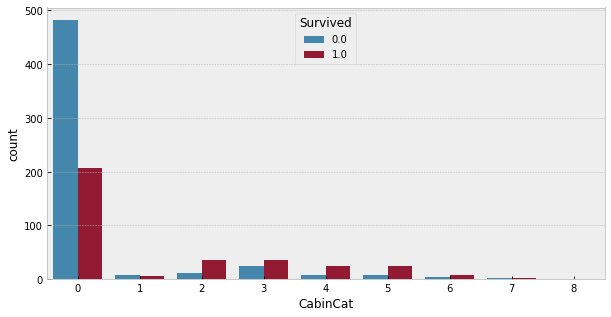

In [31]:
f, ax = plt.subplots(figsize = (10, 5))
sns.countplot('CabinCat', hue = 'Survived', data = df, ax = ax)
f.show()

Age has about 20% null values.Because of its relevance to the other features, we can fit the null values later.

# Data conversion

In [32]:
import re
from sklearn.preprocessing import LabelEncoder

In [33]:
# Title
df['Title'] = df.Name.apply(lambda x : re.search(' ([a-zA-Z]+)\.', x).group(1))
title_mapping = {'Mr' : 1, 'Miss' : 2, 'Mrs' : 3, 'Master' : 4, 'Dr' : 5, 'Rev' : 6, 'Major' : 7, 'Col' : 7, 'Mlle' : 2, 'Mme' : 3, 'Don' : 9, 'Dona' : 9, 'Lady' : 10, 'Countess' : 10, 'Jonkheer' : 10, 'Sir' : 9, 'Capt' : 7, 'Ms' : 2}
df['TitleCat'] = df.Title.map(title_mapping)

# FamilySize
df['FamilySize'] = df.SibSp + df.Parch + 1

# FamilyName
df['FamilyName'] = df.Name.apply(lambda x : str.split(x, ',')[0])

# IsAlone
df['IsAlone'] = 0
df.loc[df.FamilySize == 1, 'IsAlone'] = 1

# NameLength
le = LabelEncoder()
df['NameLength'] = df.Name.apply(lambda x : len(x))
df['NameLengthBin'] = pd.qcut(df.NameLength, 5)
df['NameLengthBinCode'] = le.fit_transform(df.NameLengthBin)

# Embarked
df['Embarked'] = pd.Categorical(df.Embarked).codes

# Sex
df = pd.concat([df, pd.get_dummies(df.Sex)], axis = 1)

# Ticket
table_ticket = pd.DataFrame(df.Ticket.value_counts())
table_ticket.rename(columns = {'Ticket' : 'TicketNum'}, inplace = True)
table_ticket['TicketId'] = pd.Categorical(table_ticket.index).codes
table_ticket.loc[table_ticket.TicketNum < 3, 'TicketId'] = -1
df = pd.merge(left = df, right = table_ticket, left_on = 'Ticket', right_index = True, how = 'left', sort = False)
df['TicketCode'] = list(pd.cut(df.TicketId, bins = [-2, 0, 500, 1000], labels = [0, 1, 2]))

# CabinNum
regex = re.compile('\s*(\w+)\s*')
df['CabinNum'] = df.Cabin.apply(lambda x : len(regex.findall(x)))

Fit the null values of Age.

In [34]:
from sklearn.ensemble import ExtraTreesRegressor

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
classers = ['Fare','Parch','Pclass','SibSp','TitleCat', 'CabinCat','female','male', 'Embarked', 'FamilySize', 'IsAlone', 'NameLengthBinCode','TicketNum','TicketCode']

etr = ExtraTreesRegressor(n_estimators = 200, random_state = 0)
age_X_train = df[classers][df.Age.notnull()]
age_y_train = df.Age[df.Age.notnull()]
age_X_test = df[classers][df.Age.isnull()]

etr.fit(age_X_train, np.ravel(age_y_train))
age_pred = etr.predict(age_X_test)
df.loc[df.Age.isnull(), 'Age'] = age_pred

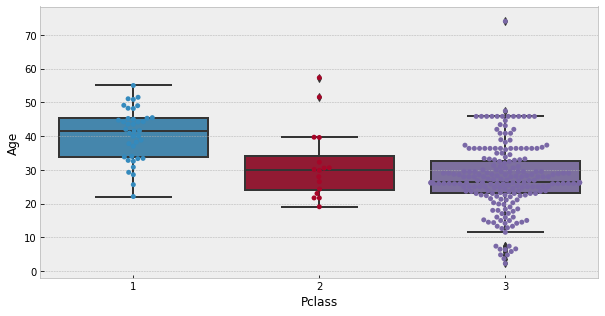

In [36]:
age_X_test['Age'] = age_pred

f, ax = plt.subplots(figsize = (10, 5))
sns.boxplot('Pclass', 'Age', data = age_X_test, ax = ax)
sns.swarmplot('Pclass', 'Age', data = age_X_test, ax = ax)

In [37]:
# Identity
childAge = 18
def getIdentity(passenger):
    age, sex = passenger
    
    if age < childAge:
        return 'child'
    elif sex == 'male':
        return 'male_adult'
    else:
        return 'female_adult'

df = pd.concat([df, pd.DataFrame(df[['Age', 'Sex']].apply(getIdentity, axis = 1), columns = ['Identity'])], axis = 1)
df = pd.concat([df, pd.get_dummies(df.Identity)], axis = 1)

In [38]:
# FamilySurvival
DEFAULT_SURVIVAL_VALUE = 0.5
df['FamilySurvival'] = DEFAULT_SURVIVAL_VALUE

for _, grp_df in df.groupby(['FamilyName', 'Fare']):
    if len(grp_df) != 1 :
        for index, row in grp_df.iterrows():
            smax = grp_df.drop(index).Survived.max()
            smin = grp_df.drop(index).Survived.min()
            pid = row.PassengerId
            
            if smax == 1:
                df.loc[df.PassengerId == pid, 'FamilySurvival'] = 1.0
            elif smin == 0:
                df.loc[df.PassengerId == pid, 'FamilySurvival'] = 0.0
for _, grp_df in df.groupby(['Ticket']):
    if len(grp_df != 1):
        for index, row in grp_df.iterrows():
            if (row.FamilySurvival == 0.0 or row.FamilySurvival == 0.5):
                smax = grp_df.drop(index).Survived.max()
                smin = grp_df.drop(index).Survived.min()
                pid = row.PassengerId
                
                if smax == 1:
                    df.loc[df.PassengerId == pid, 'FamilySurvival'] = 1.0
                elif smin == 0:
                    df.loc[df.PassengerId == pid, 'FamilySurvival'] = 0.0
                    
df.FamilySurvival.value_counts()

0.5    763
1.0    303
0.0    243
Name: FamilySurvival, dtype: int64

In [39]:
# FareBinCode
df['FareBin'] = pd.qcut(df.Fare, 5)

le = LabelEncoder()
df['FareBinCode'] = le.fit_transform(df.FareBin)

In [40]:
# AgeBinCode
df['AgeBin'] = pd.qcut(df.Age, 4)

le = LabelEncoder()
df['AgeBinCode'] = le.fit_transform(df.AgeBin)

## Normalize

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [42]:
target = data_train['Survived'].values
select_features = ['AgeBinCode', 'Embarked', 'FareBinCode', 'Parch', 'Pclass', 'SibSp', 'CabinCat', 'TitleCat', 'FamilySize', 'IsAlone', 'FamilySurvival', 'NameLengthBinCode', 'female', 'male', 'TicketNum', 'TicketCode', 'CabinNum', 'child', 'female_adult', 'male_adult']

In [43]:
#unimportant_features = ['Parch', 'Embarked', 'child', 'CabinNum']
#select_features = list(set(select_features).difference(unimportant_features))

#scaler = MinMaxScaler()
scaler = StandardScaler()

#df_scaled = df[select_features]
df_scaled = scaler.fit_transform(df[select_features])

train = df_scaled[0:891].copy()
test = df_scaled[891:].copy()

## Feature selection

In [44]:
from sklearn.feature_selection import SelectKBest, f_classif

In [45]:
selector = SelectKBest(f_classif, len(select_features))
selector.fit(train, target)
scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]

print('Features importance:')
for i in range(len(scores)):
    print('%.2f %s' % (scores[indices[i]], select_features[indices[i]]))

Features importance:
68.85 male
68.85 female
64.37 male_adult
53.83 female_adult
28.83 FamilySurvival
26.22 TitleCat
24.60 Pclass
21.58 FareBinCode
19.72 NameLengthBinCode
17.75 CabinCat
9.05 IsAlone
6.78 Embarked
3.51 child
3.00 TicketCode
1.83 Parch
1.52 CabinNum
1.28 TicketNum
0.56 AgeBinCode
0.53 SibSp
0.21 FamilySize


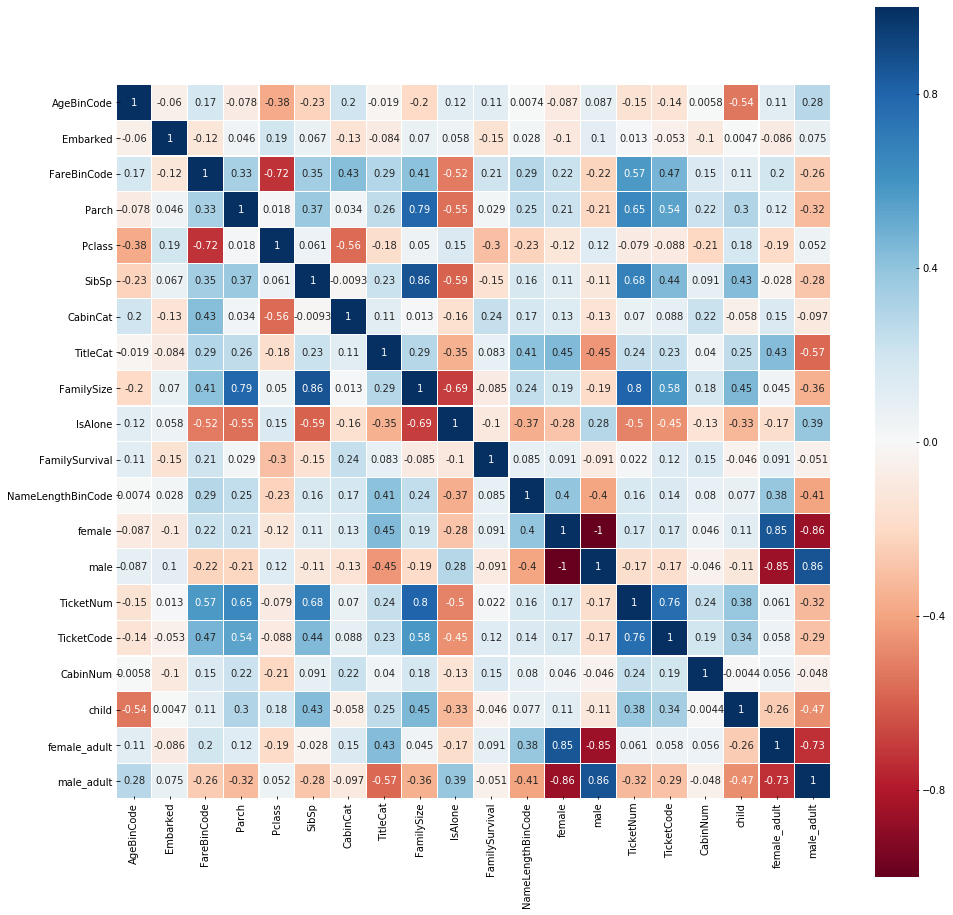

In [46]:
df_corr = df[select_features].copy()

colormap = plt.cm.RdBu
plt.figure(figsize = (16, 16))
sns.heatmap(df_corr.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)
plt.show()

In [47]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

kf = KFold(n_splits = 5, random_state = 1)

## RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc_parameters = {'max_depth' : [5], 'n_estimators' : [500], 'min_samples_split' : [9], 'random_state' : [1], 'n_jobs' : [-1]}
rfc = RandomForestClassifier()
clf_rfc = GridSearchCV(rfc, rfc_parameters, n_jobs = -1, cv = kf, scoring = 'roc_auc')

clf_rfc.fit(train, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5], 'n_estimators': [500], 'min_samples_split': [9], 'random_state': [1], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [49]:
rfc2_parameters = {'max_depth' : [2, 5, 8, 10, 20, 50], 'n_estimators' : [10, 50, 100, 200, 500, 1000, 2000], 'min_samples_split' : [2, 3, 5, 9, 20]}
rfc2 = RandomForestClassifier(random_state = 1, n_jobs = -1)
clf_rfc2 = RandomizedSearchCV(rfc2, rfc2_parameters, n_jobs = -1, cv = kf, scoring = 'roc_auc')

clf_rfc2.fit(train, target)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=False),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_depth': [2, 5, 8, 10, 20, 50], 'n_estimators': [10, 50, 100, 200, 500, 1000, 2000], 'min_samples_split': [2, 3, 5, 9, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [50]:
importance = clf_rfc.best_estimator_.feature_importances_
indices = np.argsort(importance)[::-1]

print(clf_rfc.best_score_)
print(clf_rfc.score(train, target))
print(clf_rfc.best_params_)
print('\nFeature importance:')
for i in range(len(select_features)):
    print('%.2f %s' % (importance[indices[i]], select_features[indices[i]]))

0.8939856798075764
0.9213535508473674
{'max_depth': 5, 'min_samples_split': 9, 'n_estimators': 500, 'n_jobs': -1, 'random_state': 1}

Feature importance:
0.14 TitleCat
0.13 male
0.12 female
0.11 FamilySurvival
0.11 male_adult
0.08 Pclass
0.06 female_adult
0.04 CabinCat
0.04 TicketNum
0.04 FareBinCode
0.03 FamilySize
0.03 NameLengthBinCode
0.02 SibSp
0.01 AgeBinCode
0.01 Parch
0.01 child
0.01 Embarked
0.01 TicketCode
0.00 IsAlone
0.00 CabinNum


## LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression

lr_paramaters = {'C' : [0.05, 0.1, 0.2], 'random_state' : [1]}
lr = LogisticRegression()

clf_lr = GridSearchCV(lr, lr_paramaters, n_jobs = -1, cv = kf, scoring = 'roc_auc')
clf_lr.fit(train, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.05, 0.1, 0.2], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [52]:
print(clf_lr.best_score_)
print(clf_lr.score(train, target))
print(clf_lr.best_params_)

0.8920102042733253
0.8983931443666848
{'C': 0.1, 'random_state': 1}


## svm

In [53]:
#from sklearn.svm import SVC

#svc_paramaters = {'C' : [5.5, 6, 6.5], 'kernel' : ['linear', 'rbf'], 'gamma' : ['auto', 'scale'], 'random_state' : [1]}
#svc = SVC()

#clf_svc = GridSearchCV(svc, svc_paramaters, n_jobs = -1, cv = kf, scoring = 'roc_auc')
#clf_svc.fit(train, target)

In [54]:
#print(clf_svc.best_score_)
#print(clf_svc.score(train, target))
#print(clf_svc.best_params_)

## GBDT

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt_parameters = {'subsample' : [1], 'min_samples_leaf' : [3], 'learning_rate' : [0.1], 'n_estimators' : [50], 'min_samples_split' : [2], 'max_depth' : [3], 'random_state' : [1]}
gbdt = GradientBoostingClassifier()

clf_gbdt = GridSearchCV(gbdt, gbdt_parameters, n_jobs = -1, cv = kf, scoring = 'roc_auc')
clf_gbdt.fit(train, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=False),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'subsample': [1], 'min_samples_leaf': [3], 'learning_rate': [0.1], 'n_estimators': [50], 'min_samples_split': [2], 'max_depth': [3], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [56]:
print(clf_gbdt.best_score_)
print(clf_gbdt.score(train, target))
print(clf_gbdt.best_params_)

0.9034232304911823
0.9341306362445275
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 1, 'subsample': 1}


## XGBoost

In [57]:
from xgboost import XGBClassifier

xgb_paramaters = {'subsample' : [0.7], 'min_child_weight' : [1], 'max_depth' : [3], 'learning_rate' : [0.1], 'n_estimators' : [100], 'n_jobs' : [-1], 'random_state' : [1]}
xgb = XGBClassifier()

clf_xgb = GridSearchCV(xgb, xgb_paramaters, n_jobs = -1, cv = kf, scoring = 'roc_auc')
clf_xgb.fit(train, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.7], 'min_child_weight': [1], 'max_depth': [3], 'learning_rate': [0.1], 'n_estimators': [100], 'n_jobs': [-1], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [58]:
print(clf_xgb.best_score_)
print(clf_xgb.score(train, target))
print(clf_xgb.best_params_)

0.9012309644521257
0.9429132180785905
{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 1, 'subsample': 0.7}


In [66]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [68]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,CabinNum,Identity,child,female_adult,male_adult,FamilySurvival,FareBin,FareBinCode,AgeBin,AgeBinCode
0,22.0,0,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,1,male_adult,0,0,1,0.5,"(-0.001, 7.854]",0,"(21.0, 28.0]",1
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,1,female_adult,0,1,0,0.5,"(41.579, 512.329]",4,"(28.0, 38.0]",2
2,26.0,0,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,1,female_adult,0,1,0,0.5,"(7.854, 10.5]",1,"(21.0, 28.0]",1
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,1,female_adult,0,1,0,0.0,"(41.579, 512.329]",4,"(28.0, 38.0]",2
4,35.0,0,2,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,1,male_adult,0,0,1,0.5,"(7.854, 10.5]",1,"(28.0, 38.0]",2


## Output

In [59]:
prediction = clf_rfc2.predict(test)

In [69]:
submission = pd.DataFrame({'Survived' : prediction}, index = data_test.PassengerId)
submission.to_csv('submission.csv', index_label = ['PassengerId'])

# DNN

In [92]:
from sklearn.model_selection import train_test_split
select_features = ['Survived','AgeBinCode', 'Embarked', 'FareBinCode', 'Parch', 'Pclass', 'SibSp', 'CabinCat', 'TitleCat', 'FamilySize', 'IsAlone', 'FamilySurvival', 'NameLengthBinCode', 'female', 'male', 'TicketNum', 'TicketCode', 'CabinNum', 'child', 'female_adult', 'male_adult']

dnn_data = df[0:891].copy()

dnn_data=dnn_data[select_features]
d_train,d_test=train_test_split(dnn_data,test_size=0.3,random_state=0,stratify=dnn_data['Survived'])


train_X=d_train[d_train.columns[1:]]
train_Y=d_train[d_train.columns[:1]]
test_X=d_test[d_test.columns[1:]]
test_Y=d_test[d_test.columns[:1]]

test_Y.head()

,Survived
421,0.0
618,1.0
116,0.0
310,1.0
57,0.0


In [94]:
from keras import models
from keras import layers
from keras import optimizers

model_dnn = models.Sequential()
model_dnn.add(layers.Dense(10, activation='relu', input_shape=(20,)))
model_dnn.add(layers.Dense(10, activation='relu'))
model_dnn.add(layers.Dense(1, activation='sigmoid'))

model_dnn.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


history = model_dnn.fit(train_X,train_Y,
                   epochs=2000,
                   batch_size=1024,
                   validation_data=(test_X, test_Y))

Instructions for updating:
Use tf.cast instead.
Train on 623 samples, validate on 268 samples
Epoch 1/2000
623/623 [==============================] - 1s 2ms/step - loss: 0.9470 - acc: 0.3836 - val_loss: 0.8956 - val_acc: 0.4179
Epoch 2/2000
623/623 [==============================] - 0s 8us/step - loss: 0.9078 - acc: 0.4157 - val_loss: 0.8706 - val_acc: 0.4328
Epoch 3/2000
623/623 [==============================] - 0s 6us/step - loss: 0.8830 - acc: 0.4382 - val_loss: 0.8518 - val_acc: 0.4366
Epoch 4/2000
623/623 [==============================] - 0s 6us/step - loss: 0.8639 - acc: 0.4366 - val_loss: 0.8362 - val_acc: 0.4328
Epoch 5/2000
623/623 [==============================] - 0s 3us/step - loss: 0.8476 - acc: 0.4414 - val_loss: 0.8226 - val_acc: 0.4515
Epoch 6/2000
623/623 [==============================] - 0s 8us/step - loss: 0.8336 - acc: 0.4671 - val_loss: 0.8105 - val_acc: 0.4590
Epoch 7/2000
623/623 [==============================] - 0s 8us/step - loss: 0.8209 - acc: 0.4880 - val

Epoch 60/2000
623/623 [==============================] - 0s 5us/step - loss: 0.6050 - acc: 0.7047 - val_loss: 0.6145 - val_acc: 0.6903
Epoch 61/2000
623/623 [==============================] - 0s 5us/step - loss: 0.6025 - acc: 0.7063 - val_loss: 0.6126 - val_acc: 0.6940
Epoch 62/2000
623/623 [==============================] - 0s 5us/step - loss: 0.6001 - acc: 0.7063 - val_loss: 0.6107 - val_acc: 0.6940
Epoch 63/2000
623/623 [==============================] - 0s 6us/step - loss: 0.5977 - acc: 0.7079 - val_loss: 0.6087 - val_acc: 0.6940
Epoch 64/2000
623/623 [==============================] - 0s 10us/step - loss: 0.5952 - acc: 0.7111 - val_loss: 0.6065 - val_acc: 0.6940
Epoch 65/2000
623/623 [==============================] - 0s 19us/step - loss: 0.5926 - acc: 0.7127 - val_loss: 0.6043 - val_acc: 0.6978
Epoch 66/2000
623/623 [==============================] - 0s 5us/step - loss: 0.5901 - acc: 0.7143 - val_loss: 0.6021 - val_acc: 0.7015
Epoch 67/2000
623/623 [==============================

Epoch 121/2000
623/623 [==============================] - 0s 10us/step - loss: 0.4517 - acc: 0.7881 - val_loss: 0.4903 - val_acc: 0.7910
Epoch 122/2000
623/623 [==============================] - 0s 6us/step - loss: 0.4498 - acc: 0.7881 - val_loss: 0.4887 - val_acc: 0.7910
Epoch 123/2000
623/623 [==============================] - 0s 5us/step - loss: 0.4478 - acc: 0.7913 - val_loss: 0.4870 - val_acc: 0.7910
Epoch 124/2000
623/623 [==============================] - 0s 5us/step - loss: 0.4460 - acc: 0.7961 - val_loss: 0.4854 - val_acc: 0.7873
Epoch 125/2000
623/623 [==============================] - 0s 6us/step - loss: 0.4441 - acc: 0.7961 - val_loss: 0.4838 - val_acc: 0.7910
Epoch 126/2000
623/623 [==============================] - 0s 6us/step - loss: 0.4423 - acc: 0.7945 - val_loss: 0.4823 - val_acc: 0.7910
Epoch 127/2000
623/623 [==============================] - 0s 6us/step - loss: 0.4406 - acc: 0.7961 - val_loss: 0.4808 - val_acc: 0.7910
Epoch 128/2000
623/623 [=======================

Epoch 182/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3797 - acc: 0.8395 - val_loss: 0.4325 - val_acc: 0.8209
Epoch 183/2000
623/623 [==============================] - 0s 11us/step - loss: 0.3791 - acc: 0.8395 - val_loss: 0.4323 - val_acc: 0.8209
Epoch 184/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3785 - acc: 0.8379 - val_loss: 0.4316 - val_acc: 0.8284
Epoch 185/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3780 - acc: 0.8395 - val_loss: 0.4316 - val_acc: 0.8246
Epoch 186/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3774 - acc: 0.8379 - val_loss: 0.4306 - val_acc: 0.8284
Epoch 187/2000
623/623 [==============================] - 0s 11us/step - loss: 0.3769 - acc: 0.8395 - val_loss: 0.4307 - val_acc: 0.8284
Epoch 188/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3764 - acc: 0.8379 - val_loss: 0.4298 - val_acc: 0.8284
Epoch 189/2000
623/623 [======================

Epoch 243/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3545 - acc: 0.8555 - val_loss: 0.4132 - val_acc: 0.8358
Epoch 244/2000
623/623 [==============================] - 0s 13us/step - loss: 0.3542 - acc: 0.8555 - val_loss: 0.4119 - val_acc: 0.8321
Epoch 245/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3538 - acc: 0.8571 - val_loss: 0.4128 - val_acc: 0.8358
Epoch 246/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3535 - acc: 0.8555 - val_loss: 0.4116 - val_acc: 0.8321
Epoch 247/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3532 - acc: 0.8587 - val_loss: 0.4124 - val_acc: 0.8358
Epoch 248/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3529 - acc: 0.8571 - val_loss: 0.4112 - val_acc: 0.8321
Epoch 249/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3526 - acc: 0.8571 - val_loss: 0.4120 - val_acc: 0.8358
Epoch 250/2000
623/623 [=======================

Epoch 304/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3374 - acc: 0.8668 - val_loss: 0.4020 - val_acc: 0.8545
Epoch 305/2000
623/623 [==============================] - 0s 3us/step - loss: 0.3372 - acc: 0.8732 - val_loss: 0.4032 - val_acc: 0.8358
Epoch 306/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3370 - acc: 0.8652 - val_loss: 0.4016 - val_acc: 0.8545
Epoch 307/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3366 - acc: 0.8732 - val_loss: 0.4026 - val_acc: 0.8433
Epoch 308/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3363 - acc: 0.8668 - val_loss: 0.4015 - val_acc: 0.8545
Epoch 309/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3360 - acc: 0.8732 - val_loss: 0.4021 - val_acc: 0.8433
Epoch 310/2000
623/623 [==============================] - 0s 8us/step - loss: 0.3357 - acc: 0.8668 - val_loss: 0.4013 - val_acc: 0.8507
Epoch 311/2000
623/623 [========================

Epoch 365/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3239 - acc: 0.8764 - val_loss: 0.3964 - val_acc: 0.8507
Epoch 366/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3237 - acc: 0.8780 - val_loss: 0.3954 - val_acc: 0.8507
Epoch 367/2000
623/623 [==============================] - 0s 10us/step - loss: 0.3235 - acc: 0.8764 - val_loss: 0.3962 - val_acc: 0.8507
Epoch 368/2000
623/623 [==============================] - 0s 13us/step - loss: 0.3233 - acc: 0.8780 - val_loss: 0.3952 - val_acc: 0.8507
Epoch 369/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3231 - acc: 0.8764 - val_loss: 0.3959 - val_acc: 0.8507
Epoch 370/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3228 - acc: 0.8780 - val_loss: 0.3950 - val_acc: 0.8507
Epoch 371/2000
623/623 [==============================] - 0s 14us/step - loss: 0.3226 - acc: 0.8764 - val_loss: 0.3956 - val_acc: 0.8507
Epoch 372/2000
623/623 [=====================

Epoch 426/2000
623/623 [==============================] - 0s 10us/step - loss: 0.3134 - acc: 0.8812 - val_loss: 0.3917 - val_acc: 0.8545
Epoch 427/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3133 - acc: 0.8796 - val_loss: 0.3931 - val_acc: 0.8545
Epoch 428/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3131 - acc: 0.8812 - val_loss: 0.3917 - val_acc: 0.8545
Epoch 429/2000
623/623 [==============================] - 0s 14us/step - loss: 0.3129 - acc: 0.8796 - val_loss: 0.3926 - val_acc: 0.8619
Epoch 430/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3127 - acc: 0.8812 - val_loss: 0.3916 - val_acc: 0.8545
Epoch 431/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3125 - acc: 0.8812 - val_loss: 0.3922 - val_acc: 0.8582
Epoch 432/2000
623/623 [==============================] - 0s 8us/step - loss: 0.3123 - acc: 0.8812 - val_loss: 0.3916 - val_acc: 0.8545
Epoch 433/2000
623/623 [======================

623/623 [==============================] - 0s 6us/step - loss: 0.3043 - acc: 0.8812 - val_loss: 0.3898 - val_acc: 0.8545
Epoch 487/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3042 - acc: 0.8828 - val_loss: 0.3897 - val_acc: 0.8619
Epoch 488/2000
623/623 [==============================] - 0s 16us/step - loss: 0.3040 - acc: 0.8796 - val_loss: 0.3895 - val_acc: 0.8545
Epoch 489/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3038 - acc: 0.8828 - val_loss: 0.3900 - val_acc: 0.8619
Epoch 490/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3037 - acc: 0.8812 - val_loss: 0.3895 - val_acc: 0.8582
Epoch 491/2000
623/623 [==============================] - 0s 5us/step - loss: 0.3035 - acc: 0.8828 - val_loss: 0.3898 - val_acc: 0.8657
Epoch 492/2000
623/623 [==============================] - 0s 6us/step - loss: 0.3035 - acc: 0.8828 - val_loss: 0.3893 - val_acc: 0.8582
Epoch 493/2000
623/623 [==============================] - 0s 6

Epoch 547/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2961 - acc: 0.8876 - val_loss: 0.3934 - val_acc: 0.8545
Epoch 548/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2960 - acc: 0.8828 - val_loss: 0.3921 - val_acc: 0.8470
Epoch 549/2000
623/623 [==============================] - 0s 10us/step - loss: 0.2959 - acc: 0.8876 - val_loss: 0.3938 - val_acc: 0.8619
Epoch 550/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2957 - acc: 0.8828 - val_loss: 0.3924 - val_acc: 0.8470
Epoch 551/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2955 - acc: 0.8876 - val_loss: 0.3938 - val_acc: 0.8545
Epoch 552/2000
623/623 [==============================] - 0s 13us/step - loss: 0.2955 - acc: 0.8812 - val_loss: 0.3925 - val_acc: 0.8470
Epoch 553/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2952 - acc: 0.8876 - val_loss: 0.3938 - val_acc: 0.8619
Epoch 554/2000
623/623 [======================

Epoch 608/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2888 - acc: 0.8892 - val_loss: 0.3957 - val_acc: 0.8582
Epoch 609/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2886 - acc: 0.8909 - val_loss: 0.3974 - val_acc: 0.8470
Epoch 610/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2886 - acc: 0.8909 - val_loss: 0.3959 - val_acc: 0.8582
Epoch 611/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2885 - acc: 0.8925 - val_loss: 0.3975 - val_acc: 0.8545
Epoch 612/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2884 - acc: 0.8892 - val_loss: 0.3961 - val_acc: 0.8582
Epoch 613/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2883 - acc: 0.8892 - val_loss: 0.3976 - val_acc: 0.8507
Epoch 614/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2884 - acc: 0.8892 - val_loss: 0.3964 - val_acc: 0.8582
Epoch 615/2000
623/623 [========================

Epoch 669/2000
623/623 [==============================] - 0s 11us/step - loss: 0.2825 - acc: 0.8957 - val_loss: 0.3993 - val_acc: 0.8507
Epoch 670/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2823 - acc: 0.8909 - val_loss: 0.3984 - val_acc: 0.8507
Epoch 671/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2822 - acc: 0.8925 - val_loss: 0.3993 - val_acc: 0.8507
Epoch 672/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2821 - acc: 0.8941 - val_loss: 0.3989 - val_acc: 0.8507
Epoch 673/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2820 - acc: 0.8925 - val_loss: 0.3991 - val_acc: 0.8507
Epoch 674/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2818 - acc: 0.8973 - val_loss: 0.3986 - val_acc: 0.8507
Epoch 675/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2817 - acc: 0.8941 - val_loss: 0.3997 - val_acc: 0.8507
Epoch 676/2000
623/623 [=======================

Epoch 730/2000
623/623 [==============================] - 0s 3us/step - loss: 0.2774 - acc: 0.8989 - val_loss: 0.4018 - val_acc: 0.8507
Epoch 731/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2771 - acc: 0.8989 - val_loss: 0.4041 - val_acc: 0.8507
Epoch 732/2000
623/623 [==============================] - 0s 13us/step - loss: 0.2768 - acc: 0.8989 - val_loss: 0.4021 - val_acc: 0.8507
Epoch 733/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2766 - acc: 0.8973 - val_loss: 0.4038 - val_acc: 0.8507
Epoch 734/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2764 - acc: 0.9021 - val_loss: 0.4024 - val_acc: 0.8507
Epoch 735/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2764 - acc: 0.8989 - val_loss: 0.4042 - val_acc: 0.8507
Epoch 736/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2765 - acc: 0.8989 - val_loss: 0.4023 - val_acc: 0.8507
Epoch 737/2000
623/623 [=======================

623/623 [==============================] - 0s 8us/step - loss: 0.2724 - acc: 0.9053 - val_loss: 0.4075 - val_acc: 0.8470
Epoch 791/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2721 - acc: 0.9037 - val_loss: 0.4103 - val_acc: 0.8507
Epoch 792/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2721 - acc: 0.9053 - val_loss: 0.4084 - val_acc: 0.8507
Epoch 793/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2717 - acc: 0.9101 - val_loss: 0.4094 - val_acc: 0.8507
Epoch 794/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2716 - acc: 0.9085 - val_loss: 0.4085 - val_acc: 0.8507
Epoch 795/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2716 - acc: 0.9085 - val_loss: 0.4109 - val_acc: 0.8507
Epoch 796/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2716 - acc: 0.9085 - val_loss: 0.4091 - val_acc: 0.8507
Epoch 797/2000
623/623 [==============================] - 0s 6u

Epoch 851/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2675 - acc: 0.9181 - val_loss: 0.4158 - val_acc: 0.8470
Epoch 852/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2674 - acc: 0.9101 - val_loss: 0.4139 - val_acc: 0.8507
Epoch 853/2000
623/623 [==============================] - 0s 11us/step - loss: 0.2673 - acc: 0.9165 - val_loss: 0.4157 - val_acc: 0.8470
Epoch 854/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2671 - acc: 0.9101 - val_loss: 0.4142 - val_acc: 0.8507
Epoch 855/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2671 - acc: 0.9133 - val_loss: 0.4159 - val_acc: 0.8433
Epoch 856/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2670 - acc: 0.9101 - val_loss: 0.4141 - val_acc: 0.8507
Epoch 857/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2671 - acc: 0.9149 - val_loss: 0.4167 - val_acc: 0.8433
Epoch 858/2000
623/623 [=======================

Epoch 912/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2632 - acc: 0.9101 - val_loss: 0.4200 - val_acc: 0.8470
Epoch 913/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2630 - acc: 0.9181 - val_loss: 0.4226 - val_acc: 0.8433
Epoch 914/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2628 - acc: 0.9117 - val_loss: 0.4205 - val_acc: 0.8433
Epoch 915/2000
623/623 [==============================] - 0s 13us/step - loss: 0.2625 - acc: 0.9165 - val_loss: 0.4225 - val_acc: 0.8433
Epoch 916/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2625 - acc: 0.9117 - val_loss: 0.4201 - val_acc: 0.8433
Epoch 917/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2624 - acc: 0.9165 - val_loss: 0.4232 - val_acc: 0.8433
Epoch 918/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2625 - acc: 0.9101 - val_loss: 0.4206 - val_acc: 0.8396
Epoch 919/2000
623/623 [=======================

Epoch 973/2000
623/623 [==============================] - 0s 13us/step - loss: 0.2591 - acc: 0.9181 - val_loss: 0.4277 - val_acc: 0.8470
Epoch 974/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2592 - acc: 0.9149 - val_loss: 0.4247 - val_acc: 0.8433
Epoch 975/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2588 - acc: 0.9181 - val_loss: 0.4275 - val_acc: 0.8433
Epoch 976/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2587 - acc: 0.9149 - val_loss: 0.4257 - val_acc: 0.8433
Epoch 977/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2583 - acc: 0.9181 - val_loss: 0.4268 - val_acc: 0.8433
Epoch 978/2000
623/623 [==============================] - 0s 13us/step - loss: 0.2582 - acc: 0.9165 - val_loss: 0.4260 - val_acc: 0.8433
Epoch 979/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2582 - acc: 0.9165 - val_loss: 0.4269 - val_acc: 0.8433
Epoch 980/2000
623/623 [======================

Epoch 1033/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2552 - acc: 0.9165 - val_loss: 0.4321 - val_acc: 0.8396
Epoch 1034/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2553 - acc: 0.9181 - val_loss: 0.4291 - val_acc: 0.8433
Epoch 1035/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2554 - acc: 0.9165 - val_loss: 0.4335 - val_acc: 0.8396
Epoch 1036/2000
623/623 [==============================] - 0s 10us/step - loss: 0.2556 - acc: 0.9117 - val_loss: 0.4291 - val_acc: 0.8433
Epoch 1037/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2554 - acc: 0.9165 - val_loss: 0.4331 - val_acc: 0.8396
Epoch 1038/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2552 - acc: 0.9149 - val_loss: 0.4294 - val_acc: 0.8433
Epoch 1039/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2550 - acc: 0.9165 - val_loss: 0.4332 - val_acc: 0.8396
Epoch 1040/2000
623/623 [===============

Epoch 1093/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2521 - acc: 0.9181 - val_loss: 0.4369 - val_acc: 0.8396
Epoch 1094/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2521 - acc: 0.9149 - val_loss: 0.4339 - val_acc: 0.8470
Epoch 1095/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2523 - acc: 0.9165 - val_loss: 0.4384 - val_acc: 0.8396
Epoch 1096/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2525 - acc: 0.9149 - val_loss: 0.4339 - val_acc: 0.8433
Epoch 1097/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2524 - acc: 0.9165 - val_loss: 0.4381 - val_acc: 0.8396
Epoch 1098/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2522 - acc: 0.9149 - val_loss: 0.4349 - val_acc: 0.8433
Epoch 1099/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2521 - acc: 0.9165 - val_loss: 0.4371 - val_acc: 0.8396
Epoch 1100/2000
623/623 [================

Epoch 1153/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2492 - acc: 0.9181 - val_loss: 0.4412 - val_acc: 0.8433
Epoch 1154/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2491 - acc: 0.9165 - val_loss: 0.4403 - val_acc: 0.8433
Epoch 1155/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2493 - acc: 0.9181 - val_loss: 0.4421 - val_acc: 0.8433
Epoch 1156/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2494 - acc: 0.9181 - val_loss: 0.4403 - val_acc: 0.8433
Epoch 1157/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2493 - acc: 0.9149 - val_loss: 0.4427 - val_acc: 0.8396
Epoch 1158/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2493 - acc: 0.9165 - val_loss: 0.4391 - val_acc: 0.8433
Epoch 1159/2000
623/623 [==============================] - 0s 10us/step - loss: 0.2492 - acc: 0.9181 - val_loss: 0.4432 - val_acc: 0.8396
Epoch 1160/2000
623/623 [===============

Epoch 1213/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2468 - acc: 0.9181 - val_loss: 0.4476 - val_acc: 0.8433
Epoch 1214/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2468 - acc: 0.9149 - val_loss: 0.4441 - val_acc: 0.8433
Epoch 1215/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2468 - acc: 0.9197 - val_loss: 0.4482 - val_acc: 0.8433
Epoch 1216/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2468 - acc: 0.9117 - val_loss: 0.4443 - val_acc: 0.8433
Epoch 1217/2000
623/623 [==============================] - 0s 11us/step - loss: 0.2469 - acc: 0.9197 - val_loss: 0.4490 - val_acc: 0.8396
Epoch 1218/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2468 - acc: 0.9117 - val_loss: 0.4448 - val_acc: 0.8433
Epoch 1219/2000
623/623 [==============================] - 0s 3us/step - loss: 0.2468 - acc: 0.9197 - val_loss: 0.4494 - val_acc: 0.8433
Epoch 1220/2000
623/623 [===============

Epoch 1273/2000
623/623 [==============================] - 0s 10us/step - loss: 0.2444 - acc: 0.9197 - val_loss: 0.4522 - val_acc: 0.8433
Epoch 1274/2000
623/623 [==============================] - 0s 10us/step - loss: 0.2441 - acc: 0.9133 - val_loss: 0.4484 - val_acc: 0.8433
Epoch 1275/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2442 - acc: 0.9197 - val_loss: 0.4526 - val_acc: 0.8396
Epoch 1276/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2441 - acc: 0.9133 - val_loss: 0.4487 - val_acc: 0.8433
Epoch 1277/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2441 - acc: 0.9181 - val_loss: 0.4529 - val_acc: 0.8396
Epoch 1278/2000
623/623 [==============================] - 0s 11us/step - loss: 0.2442 - acc: 0.9117 - val_loss: 0.4493 - val_acc: 0.8396
Epoch 1279/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2447 - acc: 0.9181 - val_loss: 0.4533 - val_acc: 0.8396
Epoch 1280/2000
623/623 [=============

Epoch 1333/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2420 - acc: 0.9181 - val_loss: 0.4562 - val_acc: 0.8433
Epoch 1334/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2417 - acc: 0.9149 - val_loss: 0.4533 - val_acc: 0.8470
Epoch 1335/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2417 - acc: 0.9181 - val_loss: 0.4564 - val_acc: 0.8433
Epoch 1336/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2416 - acc: 0.9149 - val_loss: 0.4526 - val_acc: 0.8470
Epoch 1337/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2419 - acc: 0.9181 - val_loss: 0.4573 - val_acc: 0.8433
Epoch 1338/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2417 - acc: 0.9149 - val_loss: 0.4530 - val_acc: 0.8470
Epoch 1339/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2420 - acc: 0.9181 - val_loss: 0.4578 - val_acc: 0.8433
Epoch 1340/2000
623/623 [================

Epoch 1393/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2399 - acc: 0.9165 - val_loss: 0.4600 - val_acc: 0.8470
Epoch 1394/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2397 - acc: 0.9181 - val_loss: 0.4574 - val_acc: 0.8396
Epoch 1395/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2403 - acc: 0.9165 - val_loss: 0.4610 - val_acc: 0.8470
Epoch 1396/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2396 - acc: 0.9165 - val_loss: 0.4568 - val_acc: 0.8433
Epoch 1397/2000
623/623 [==============================] - 0s 10us/step - loss: 0.2399 - acc: 0.9181 - val_loss: 0.4607 - val_acc: 0.8470
Epoch 1398/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2394 - acc: 0.9165 - val_loss: 0.4579 - val_acc: 0.8433
Epoch 1399/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2394 - acc: 0.9197 - val_loss: 0.4607 - val_acc: 0.8433
Epoch 1400/2000
623/623 [===============

Epoch 1453/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2378 - acc: 0.9213 - val_loss: 0.4647 - val_acc: 0.8470
Epoch 1454/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2375 - acc: 0.9149 - val_loss: 0.4614 - val_acc: 0.8470
Epoch 1455/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2374 - acc: 0.9230 - val_loss: 0.4648 - val_acc: 0.8433
Epoch 1456/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2373 - acc: 0.9165 - val_loss: 0.4602 - val_acc: 0.8470
Epoch 1457/2000
623/623 [==============================] - 0s 10us/step - loss: 0.2373 - acc: 0.9230 - val_loss: 0.4643 - val_acc: 0.8470
Epoch 1458/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2372 - acc: 0.9149 - val_loss: 0.4615 - val_acc: 0.8470
Epoch 1459/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2375 - acc: 0.9230 - val_loss: 0.4649 - val_acc: 0.8470
Epoch 1460/2000
623/623 [===============

Epoch 1513/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2362 - acc: 0.9230 - val_loss: 0.4697 - val_acc: 0.8433
Epoch 1514/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2360 - acc: 0.9133 - val_loss: 0.4652 - val_acc: 0.8433
Epoch 1515/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2355 - acc: 0.9230 - val_loss: 0.4691 - val_acc: 0.8470
Epoch 1516/2000
623/623 [==============================] - 0s 13us/step - loss: 0.2352 - acc: 0.9133 - val_loss: 0.4640 - val_acc: 0.8433
Epoch 1517/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2352 - acc: 0.9230 - val_loss: 0.4685 - val_acc: 0.8470
Epoch 1518/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2352 - acc: 0.9133 - val_loss: 0.4653 - val_acc: 0.8433
Epoch 1519/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2353 - acc: 0.9230 - val_loss: 0.4696 - val_acc: 0.8507
Epoch 1520/2000
623/623 [===============

Epoch 1573/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2337 - acc: 0.9197 - val_loss: 0.4736 - val_acc: 0.8507
Epoch 1574/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2336 - acc: 0.9149 - val_loss: 0.4683 - val_acc: 0.8433
Epoch 1575/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2337 - acc: 0.9197 - val_loss: 0.4729 - val_acc: 0.8507
Epoch 1576/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2335 - acc: 0.9149 - val_loss: 0.4689 - val_acc: 0.8433
Epoch 1577/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2337 - acc: 0.9197 - val_loss: 0.4725 - val_acc: 0.8470
Epoch 1578/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2332 - acc: 0.9149 - val_loss: 0.4698 - val_acc: 0.8470
Epoch 1579/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2331 - acc: 0.9213 - val_loss: 0.4728 - val_acc: 0.8470
Epoch 1580/2000
623/623 [================

Epoch 1633/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2314 - acc: 0.9213 - val_loss: 0.4777 - val_acc: 0.8470
Epoch 1634/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2314 - acc: 0.9149 - val_loss: 0.4727 - val_acc: 0.8396
Epoch 1635/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2319 - acc: 0.9230 - val_loss: 0.4788 - val_acc: 0.8470
Epoch 1636/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2318 - acc: 0.9149 - val_loss: 0.4738 - val_acc: 0.8396
Epoch 1637/2000
623/623 [==============================] - 0s 14us/step - loss: 0.2318 - acc: 0.9213 - val_loss: 0.4804 - val_acc: 0.8433
Epoch 1638/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2320 - acc: 0.9149 - val_loss: 0.4737 - val_acc: 0.8396
Epoch 1639/2000
623/623 [==============================] - 0s 10us/step - loss: 0.2318 - acc: 0.9230 - val_loss: 0.4787 - val_acc: 0.8470
Epoch 1640/2000
623/623 [==============

Epoch 1693/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2293 - acc: 0.9213 - val_loss: 0.4834 - val_acc: 0.8433
Epoch 1694/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2294 - acc: 0.9213 - val_loss: 0.4815 - val_acc: 0.8396
Epoch 1695/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2290 - acc: 0.9213 - val_loss: 0.4823 - val_acc: 0.8433
Epoch 1696/2000
623/623 [==============================] - 0s 11us/step - loss: 0.2289 - acc: 0.9213 - val_loss: 0.4804 - val_acc: 0.8396
Epoch 1697/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2290 - acc: 0.9213 - val_loss: 0.4845 - val_acc: 0.8433
Epoch 1698/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2291 - acc: 0.9197 - val_loss: 0.4790 - val_acc: 0.8396
Epoch 1699/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2300 - acc: 0.9246 - val_loss: 0.4866 - val_acc: 0.8433
Epoch 1700/2000
623/623 [===============

Epoch 1753/2000
623/623 [==============================] - 0s 11us/step - loss: 0.2271 - acc: 0.9213 - val_loss: 0.4903 - val_acc: 0.8507
Epoch 1754/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2274 - acc: 0.9197 - val_loss: 0.4837 - val_acc: 0.8358
Epoch 1755/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2279 - acc: 0.9230 - val_loss: 0.4904 - val_acc: 0.8507
Epoch 1756/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2277 - acc: 0.9165 - val_loss: 0.4851 - val_acc: 0.8358
Epoch 1757/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2274 - acc: 0.9230 - val_loss: 0.4907 - val_acc: 0.8507
Epoch 1758/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2273 - acc: 0.9197 - val_loss: 0.4842 - val_acc: 0.8358
Epoch 1759/2000
623/623 [==============================] - 0s 13us/step - loss: 0.2270 - acc: 0.9230 - val_loss: 0.4897 - val_acc: 0.8470
Epoch 1760/2000
623/623 [==============

Epoch 1813/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2250 - acc: 0.9246 - val_loss: 0.4944 - val_acc: 0.8470
Epoch 1814/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2253 - acc: 0.9181 - val_loss: 0.4893 - val_acc: 0.8358
Epoch 1815/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2256 - acc: 0.9246 - val_loss: 0.4957 - val_acc: 0.8507
Epoch 1816/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2255 - acc: 0.9181 - val_loss: 0.4881 - val_acc: 0.8358
Epoch 1817/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2254 - acc: 0.9246 - val_loss: 0.4936 - val_acc: 0.8470
Epoch 1818/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2248 - acc: 0.9197 - val_loss: 0.4906 - val_acc: 0.8358
Epoch 1819/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2245 - acc: 0.9246 - val_loss: 0.4950 - val_acc: 0.8433
Epoch 1820/2000
623/623 [================

Epoch 1873/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2230 - acc: 0.9246 - val_loss: 0.4995 - val_acc: 0.8396
Epoch 1874/2000
623/623 [==============================] - 0s 14us/step - loss: 0.2237 - acc: 0.9213 - val_loss: 0.4946 - val_acc: 0.8358
Epoch 1875/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2237 - acc: 0.9230 - val_loss: 0.5004 - val_acc: 0.8396
Epoch 1876/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2236 - acc: 0.9246 - val_loss: 0.4917 - val_acc: 0.8358
Epoch 1877/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2233 - acc: 0.9246 - val_loss: 0.4983 - val_acc: 0.8396
Epoch 1878/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2229 - acc: 0.9213 - val_loss: 0.4951 - val_acc: 0.8358
Epoch 1879/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2225 - acc: 0.9246 - val_loss: 0.4985 - val_acc: 0.8396
Epoch 1880/2000
623/623 [===============

Epoch 1933/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2205 - acc: 0.9262 - val_loss: 0.5021 - val_acc: 0.8396
Epoch 1934/2000
623/623 [==============================] - 0s 10us/step - loss: 0.2206 - acc: 0.9246 - val_loss: 0.4957 - val_acc: 0.8396
Epoch 1935/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2215 - acc: 0.9230 - val_loss: 0.5035 - val_acc: 0.8358
Epoch 1936/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2217 - acc: 0.9230 - val_loss: 0.4987 - val_acc: 0.8358
Epoch 1937/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2214 - acc: 0.9230 - val_loss: 0.5038 - val_acc: 0.8358
Epoch 1938/2000
623/623 [==============================] - 0s 5us/step - loss: 0.2210 - acc: 0.9230 - val_loss: 0.4967 - val_acc: 0.8396
Epoch 1939/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2210 - acc: 0.9230 - val_loss: 0.5022 - val_acc: 0.8358
Epoch 1940/2000
623/623 [===============

Epoch 1993/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2198 - acc: 0.9246 - val_loss: 0.5067 - val_acc: 0.8396
Epoch 1994/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2191 - acc: 0.9230 - val_loss: 0.5038 - val_acc: 0.8358
Epoch 1995/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2187 - acc: 0.9246 - val_loss: 0.5068 - val_acc: 0.8396
Epoch 1996/2000
623/623 [==============================] - 0s 13us/step - loss: 0.2185 - acc: 0.9246 - val_loss: 0.5024 - val_acc: 0.8396
Epoch 1997/2000
623/623 [==============================] - 0s 8us/step - loss: 0.2186 - acc: 0.9246 - val_loss: 0.5055 - val_acc: 0.8396
Epoch 1998/2000
623/623 [==============================] - 0s 19us/step - loss: 0.2185 - acc: 0.9246 - val_loss: 0.5041 - val_acc: 0.8396
Epoch 1999/2000
623/623 [==============================] - 0s 6us/step - loss: 0.2188 - acc: 0.9246 - val_loss: 0.5089 - val_acc: 0.8358
Epoch 2000/2000
623/623 [==============

In [100]:
dnn_test = df[891:].copy()
select_features_test = ['AgeBinCode', 'Embarked', 'FareBinCode', 'Parch', 'Pclass', 'SibSp', 'CabinCat', 'TitleCat', 'FamilySize', 'IsAlone', 'FamilySurvival', 'NameLengthBinCode', 'female', 'male', 'TicketNum', 'TicketCode', 'CabinNum', 'child', 'female_adult', 'male_adult']
dnn_test=dnn_test[select_features_test]
dnn_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 20 columns):
AgeBinCode           418 non-null int64
Embarked             418 non-null int8
FareBinCode          418 non-null int64
Parch                418 non-null int64
Pclass               418 non-null int64
SibSp                418 non-null int64
CabinCat             418 non-null int8
TitleCat             418 non-null int64
FamilySize           418 non-null int64
IsAlone              418 non-null int64
FamilySurvival       418 non-null float64
NameLengthBinCode    418 non-null int64
female               418 non-null uint8
male                 418 non-null uint8
TicketNum            418 non-null int64
TicketCode           418 non-null int64
CabinNum             418 non-null int64
child                418 non-null uint8
female_adult         418 non-null uint8
male_adult           418 non-null uint8
dtypes: float64(1), int64(12), int8(2), uint8(5)
memory usage: 48.6 KB


In [102]:
prediction2=model_dnn.predict(dnn_test)

y_final = (prediction2 > 0.5).astype(int).ravel()
test_df = pd.read_csv("data/test.csv")
submission = pd.DataFrame({
         "PassengerId": test_df["PassengerId"],
         "Survived": y_final
     })
submission.to_csv('submission3_1_dnn.csv', index=False)